In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### DataFrame with Subject and Each ICD9 Code They Have

In [7]:
patients = pd.read_csv('DIAGNOSES_ICD.csv')
codes = pd.read_csv('D_ICD_DIAGNOSES.csv')

w_code = patients.merge(codes, on = 'ICD9_CODE')[['SUBJECT_ID', 'ICD9_CODE', 'SHORT_TITLE']]
w_code

,SUBJECT_ID,ICD9_CODE,SHORT_TITLE
0,109,40301,Mal hyp kid w cr kid V
1,109,40301,Mal hyp kid w cr kid V
2,109,40301,Mal hyp kid w cr kid V
3,109,40301,Mal hyp kid w cr kid V
4,109,40301,Mal hyp kid w cr kid V
...,...,...,...
634704,99873,2982,Reactive confusion
634705,97547,E9399,Adv eff psychotropic NOS
634706,97339,E0070,Tackle football
634707,95806,6940,Dermatitis herpetiformis


### Summary Stats of Patients Illness Counts

In [8]:
w_code.drop_duplicates().groupby('SUBJECT_ID').count().ICD9_CODE.describe()

count    46517.000000
mean        12.283359
std          9.891100
min          1.000000
25%          6.000000
50%          9.000000
75%         16.000000
max        143.000000
Name: ICD9_CODE, dtype: float64

### Percent of Patients with Sepsis

In [9]:
sepsis = w_code.SHORT_TITLE.str.contains('sepsis').astype(int)
w_code['HAS_SEPSIS'] = sepsis
w_code = w_code.drop_duplicates()

In [10]:
w_code.HAS_SEPSIS.mean() * 100

0.6619004699108307

### Most Common Illnesses

In [11]:
w_code.groupby('SHORT_TITLE').count().sort_values('SUBJECT_ID', ascending = False)[['ICD9_CODE']]

,ICD9_CODE
SHORT_TITLE,
Hypertension NOS,17613
Crnry athrscl natve vssl,10775
Atrial fibrillation,10271
CHF NOS,9843
Acute kidney failure NOS,7687
...,...
Late eff-legal intervent,1
Late effect dislocation,1
Late effect of contusion,1


### Percentage of Illnesses for those who have sepsis

In [12]:
sepsis_patients = w_code.groupby('SUBJECT_ID').max()[['HAS_SEPSIS']]
sepsis_patients = w_code.merge(sepsis_patients, left_on = 'SUBJECT_ID', right_index=True)
sepsis_patients['HAS_SEPSIS'] = sepsis_patients['HAS_SEPSIS_y']
sepsis_patients = sepsis_patients.drop(columns = ['HAS_SEPSIS_x', 'HAS_SEPSIS_y'])
yes_sepsis = sepsis_patients[sepsis_patients['HAS_SEPSIS'] == 1]
perc_sepsis = ((yes_sepsis.groupby('SHORT_TITLE').count().SUBJECT_ID / yes_sepsis.SUBJECT_ID.nunique()) * 100).sort_values(ascending = False)
perc_sepsis

SHORT_TITLE
Severe sepsis               94.130090
Septicemia NOS              60.867266
Septic shock                59.862507
Acute kidney failure NOS    50.105764
Acute respiratry failure    49.338974
                              ...    
Mal neo lip/vermil NOS       0.026441
Periph T cell lym xtrndl     0.026441
Peripartum card-postpart     0.026441
Periodontal disease NEC      0.026441
Concussion w/o coma          0.026441
Name: SUBJECT_ID, Length: 3605, dtype: float64

### Percentage of Illnesses for those who don't have sepsis

In [13]:
no_sepsis = sepsis_patients[sepsis_patients['HAS_SEPSIS'] == 0]
perc_no_sepsis = ((no_sepsis.groupby('SHORT_TITLE').count().SUBJECT_ID / no_sepsis.SUBJECT_ID.nunique()) * 100).sort_values(ascending = False)
perc_no_sepsis

SHORT_TITLE
Hypertension NOS            37.592138
Crnry athrscl natve vssl    23.472563
Atrial fibrillation         21.017901
CHF NOS                     19.581140
Hyperlipidemia NEC/NOS      15.823096
                              ...    
Explosives accident NEC      0.002340
Expressive language dis      0.002340
Expulsive choroid hemorr     0.002340
Pois-antineopl/immunosup     0.002340
"ventilation" pneumonit      0.002340
Name: SUBJECT_ID, Length: 6554, dtype: float64

### Differences in Diagnosis Percentages

In [14]:
# Differences in diagnosis percentages 
diffs = perc_sepsis.to_frame().reset_index().merge(perc_no_sepsis.to_frame().reset_index(), on = 'SHORT_TITLE')
diffs = diffs.rename(columns = {'SUBJECT_ID_x' : 'PERC_SEPSIS', 'SUBJECT_ID_y' : 'PERC_NON_SEPSIS'})
diffs['PERC_DIFFERENCE'] = (diffs['PERC_SEPSIS'] - diffs['PERC_NON_SEPSIS'])
diffs.sort_values('PERC_DIFFERENCE', ascending = False)

,SHORT_TITLE,PERC_SEPSIS,PERC_NON_SEPSIS,PERC_DIFFERENCE
1,Septic shock,59.862507,0.355680,59.506826
0,Septicemia NOS,60.867266,2.646543,58.220723
3,Acute respiratry failure,49.338974,11.356031,37.982943
2,Acute kidney failure NOS,50.105764,13.553294,36.552471
8,Acidosis,29.534638,7.160407,22.374231
...,...,...,...,...
474,Routine circumcision,0.898995,4.637885,-3.738889
13,Crnry athrscl natve vssl,19.672131,23.472563,-3.800432
339,Single lb in-hosp w/o cs,1.348493,8.225108,-6.876615
171,Need prphyl vc vrl hepat,2.776309,13.270153,-10.493844


### ICD9 Codes

In [15]:
icd_code_df = pd.read_csv('icd9_codes.csv')

In [16]:
icd_code_dict = pd.Series(icd_code_df.short_title.values, index=icd_code_df.icd9_code).to_dict()
icd_code_dict

{'01166': 'TB pneumonia-oth test',
 '01170': 'TB pneumothorax-unspec',
 '01171': 'TB pneumothorax-no exam',
 '01172': 'TB pneumothorx-exam unkn',
 '01173': 'TB pneumothorax-micro dx',
 '01174': 'TB pneumothorax-cult dx',
 '01175': 'TB pneumothorax-histo dx',
 '01176': 'TB pneumothorax-oth test',
 '01180': 'Pulmonary TB NEC-unspec',
 '01181': 'Pulmonary TB NEC-no exam',
 '01182': 'Pulmon TB NEC-exam unkn',
 '01183': 'Pulmon TB NEC-micro dx',
 '01184': 'Pulmon TB NEC-cult dx',
 '01185': 'Pulmon TB NEC-histo dx',
 '01186': 'Pulmon TB NEC-oth test',
 '01190': 'Pulmonary TB NOS-unspec',
 '01191': 'Pulmonary TB NOS-no exam',
 '01192': 'Pulmon TB NOS-exam unkn',
 '01193': 'Pulmon TB NOS-micro dx',
 '01194': 'Pulmon TB NOS-cult dx',
 '01195': 'Pulmon TB NOS-histo dx',
 '01196': 'Pulmon TB NOS-oth test',
 '01200': 'TB pleurisy-unspec',
 '01201': 'TB pleurisy-no exam',
 '01202': 'TB pleurisy-exam unkn',
 '01203': 'TB pleurisy-micro dx',
 '01204': 'TB pleurisy-cult dx',
 '01205': 'TB pleurisy-his

In [17]:
icd_code_dict['0389']

'Septicemia NOS'

### Sepsis Data

In [22]:
sepsis = pd.read_csv('data-morbidities_and_sepsis.csv')
sepsis.head()


,hadm_id,icd_codes
0,100028,"{5184,5761,0389,8738,2875,42731,99591,E9288,57..."
1,100074,"{07054,51881,55220,5715,0389,78552,5570,79989,..."
2,100104,"{56982,5570,78552,99592,5601,99749,5849,30501,..."
3,100117,"{496,5849,481,0382,2859,99592}"
4,100118,"{5859,2767,V4579,V4365,V5861,V1251,V1254,V1582..."


In [23]:
sepsis.shape

(5181, 2)

In [24]:
len(np.unique(sepsis['hadm_id']))

5181

In [25]:
type(sepsis['icd_codes'][0])

str

In [26]:
# Define a function that converts the string representation of sets into a list of strings
def convert_to_list_of_strings(icd_codes_str):
    # Remove the curly braces and split the string into elements
    icd_codes_list = icd_codes_str.strip('{}').split(',')
    
    # Ensure each code is a string and strip any extra whitespace
    icd_codes_list = [str(code).strip() for code in icd_codes_list]
    
    return icd_codes_list

# Apply this function to each row in the 'icd_codes' column
sepsis['icd_codes'] = sepsis['icd_codes'].apply(convert_to_list_of_strings)

In [27]:
sepsis['icd_codes']

0       [5184, 5761, 0389, 8738, 2875, 42731, 99591, E...
1       [07054, 51881, 55220, 5715, 0389, 78552, 5570,...
2       [56982, 5570, 78552, 99592, 5601, 99749, 5849,...
3                     [496, 5849, 481, 0382, 2859, 99592]
4       [5859, 2767, V4579, V4365, V5861, V1251, V1254...
                              ...                        
5176    [51881, 2866, 2762, 4251, 41189, V1504, 78552,...
5177    [34830, 5849, 99859, 0389, 99592, 2768, 45829,...
5178    [5724, 2762, 0389, V103, 4019, 42731, 51882, 9...
5179    [V427, 2639, 99591, 78791, 5303, 2761, 5568, 4...
5180    [E8889, 5779, 99592, V103, 2449, 4019, 79092, ...
Name: icd_codes, Length: 5181, dtype: object

In [28]:
def contains_99591(icd_codes_list):
    return '99591' in icd_codes_list

# Apply this function to the 'icd_codes' column and filter rows
filtered_sepsis = sepsis[sepsis['icd_codes'].apply(contains_99591)]

In [29]:
filtered_sepsis

,hadm_id,icd_codes
0,100028,"[5184, 5761, 0389, 8738, 2875, 42731, 99591, E..."
5,100141,"[33829, 55090, 25000, 4019, 7245, 99591, 51881..."
7,100191,"[1101, 3963, 5990, 5070, 99591, 03849, 431, 28..."
8,100206,"[4240, 78609, 6144, E8497, 42731, V4501, 2859,..."
16,100261,"[5849, 5881, E8859, 2449, 45342, 5990, 49390, ..."
...,...,...
5154,199530,"[99591, 0389, 3485, 78039, 1983, 60000, V1011,..."
5166,199697,"[42731, 44023, 41071, 27652, 70712, 70714, 707..."
5173,199813,"[80702, 29680, 496, 30400, 78820, 30000, E8160..."
5174,199834,"[5579, 78959, 42830, 5119, 4254, 99591, 47830,..."


In [30]:
def contains_99592(icd_codes_list):
    return '99592' in icd_codes_list

# Apply this function to the 'icd_codes' column and filter rows
filtered_severe_sepsis = sepsis[sepsis['icd_codes'].apply(contains_99592)]

In [31]:
filtered_severe_sepsis

,hadm_id,icd_codes
1,100074,"[07054, 51881, 55220, 5715, 0389, 78552, 5570,..."
2,100104,"[56982, 5570, 78552, 99592, 5601, 99749, 5849,..."
3,100117,"[496, 5849, 481, 0382, 2859, 99592]"
4,100118,"[5859, 2767, V4579, V4365, V5861, V1251, V1254..."
6,100160,"[496, 0389, 4019, 99592, 1550, 78552, 42731]"
...,...,...
5175,199855,"[2851, 99811, 2765, 53081, 4439, 25000, V4581,..."
5176,199880,"[51881, 2866, 2762, 4251, 41189, V1504, 78552,..."
5177,199900,"[34830, 5849, 99859, 0389, 99592, 2768, 45829,..."
5178,199919,"[5724, 2762, 0389, V103, 4019, 42731, 51882, 9..."


In [32]:

def contains_required_codes(icd_codes_list):
    # Set of required codes
    required_codes = {'99592', '99591'}
    
    return required_codes.issubset(icd_codes_list)


filtered_sepsis_severe_sepsis = sepsis[sepsis['icd_codes'].apply(contains_required_codes)]
filtered_sepsis_severe_sepsis

,hadm_id,icd_codes
356,107047,"[0380, 99931, V0980, 99591, 03843, 99592, 7855..."
1277,124482,"[99591, 99931, 5763, 5845, 5185, 1125, 78552, ..."


__No overlap of codes :)__

In [33]:
sepsis_distribution = {'Severe Sepsis': 3912, 'Sepsis': 1271}

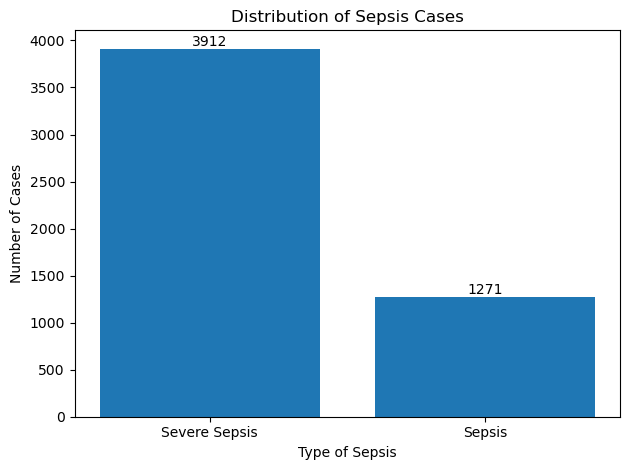

In [39]:
# Names of groups to be displayed on the x-axis
categories = list(sepsis_distribution.keys())

# Corresponding values for each group
values = list(sepsis_distribution.values())

plt.bar(categories, values)  # Optional: You can customize the colors

# Adding a title and labels
plt.title('Distribution of Sepsis Cases')
plt.xlabel('Type of Sepsis')
plt.ylabel('Number of Cases')

# Optional: Adding value labels on each bar
for i in range(len(values)):
    plt.text(i, values[i], str(values[i]), ha = 'center', va = 'bottom')

# Displaying the chart
plt.tight_layout()
plt.show()

In [40]:
#sepsis['icd_codes_sorted'] = sepsis['icd_codes'].apply(lambda x: sorted(x))

### Find the number of diseases

In [41]:
def num_disease(df):
    df_c = df.copy()
    df_c['num_disease'] = df_c['icd_codes'].apply(len)
    return df_c

In [42]:
sepsis = num_disease(sepsis)
sepsis

,hadm_id,icd_codes,num_disease
0,100028,"[5184, 5761, 0389, 8738, 2875, 42731, 99591, E...",9
1,100074,"[07054, 51881, 55220, 5715, 0389, 78552, 5570,...",9
2,100104,"[56982, 5570, 78552, 99592, 5601, 99749, 5849,...",12
3,100117,"[496, 5849, 481, 0382, 2859, 99592]",6
4,100118,"[5859, 2767, V4579, V4365, V5861, V1251, V1254...",27
...,...,...,...
5176,199880,"[51881, 2866, 2762, 4251, 41189, V1504, 78552,...",19
5177,199900,"[34830, 5849, 99859, 0389, 99592, 2768, 45829,...",30
5178,199919,"[5724, 2762, 0389, V103, 4019, 42731, 51882, 9...",16
5179,199929,"[V427, 2639, 99591, 78791, 5303, 2761, 5568, 4...",12


In [43]:
grouped_result = sepsis.groupby('num_disease').count()
result = grouped_result.sort_values('hadm_id', ascending = False).reset_index()
result.rename(columns={'hadm_id': 'count'}, inplace=True)

In [44]:
result_all = result[['num_disease', 'count']]
result_all

,num_disease,count
0,17,331
1,18,315
2,16,303
3,15,302
4,9,300
5,19,298
6,14,282
7,12,272
8,20,270
9,13,245


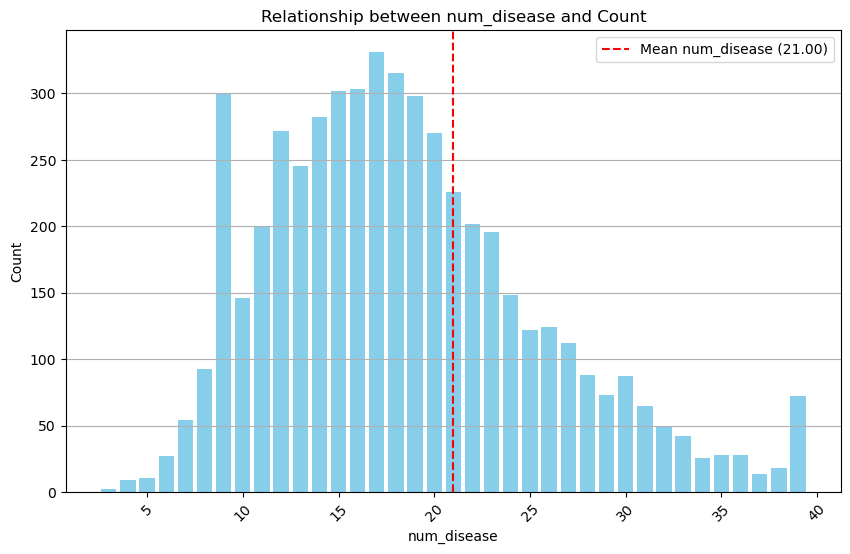

In [45]:
# Assuming 'result_all' is your DataFrame with 'num_disease' and 'count' columns

plt.figure(figsize=(10, 6))
plt.bar(result_all['num_disease'], result_all['count'], color='skyblue')

# Calculate the mean of 'num_disease'
mean_num_disease = result_all['num_disease'].mean()

# Add the mean as a vertical line
plt.axvline(x=mean_num_disease, color='red', linestyle='--', label=f'Mean num_disease ({mean_num_disease:.2f})')

# Add labels and title
plt.xlabel('num_disease')
plt.ylabel('Count')
plt.title('Relationship between num_disease and Count')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the chart
plt.grid(axis='y')
plt.legend()  # Display the legend with the mean line
plt.show()


In [46]:
filtered_severe_sepsis = num_disease(filtered_severe_sepsis)
grouped_result = filtered_severe_sepsis.groupby('num_disease').count()
result = grouped_result.sort_values('hadm_id', ascending = False).reset_index()
result.rename(columns={'hadm_id': 'count'}, inplace=True)
filtered_severe_sepsis_result = result
filtered_severe_sepsis_result

,num_disease,count,icd_codes
0,17,267,267
1,18,238,238
2,15,232,232
3,19,224,224
4,16,222,222
5,14,218,218
6,20,216,216
7,9,207,207
8,12,195,195
9,13,188,188


In [47]:
filtered_severe_sepsis

,hadm_id,icd_codes,num_disease
1,100074,"[07054, 51881, 55220, 5715, 0389, 78552, 5570,...",9
2,100104,"[56982, 5570, 78552, 99592, 5601, 99749, 5849,...",12
3,100117,"[496, 5849, 481, 0382, 2859, 99592]",6
4,100118,"[5859, 2767, V4579, V4365, V5861, V1251, V1254...",27
6,100160,"[496, 0389, 4019, 99592, 1550, 78552, 42731]",7
...,...,...,...
5175,199855,"[2851, 99811, 2765, 53081, 4439, 25000, V4581,...",20
5176,199880,"[51881, 2866, 2762, 4251, 41189, V1504, 78552,...",19
5177,199900,"[34830, 5849, 99859, 0389, 99592, 2768, 45829,...",30
5178,199919,"[5724, 2762, 0389, V103, 4019, 42731, 51882, 9...",16


In [48]:
filtered_sepsis = num_disease(filtered_sepsis)
grouped_result = filtered_sepsis.groupby('num_disease').count()
result = grouped_result.sort_values('hadm_id', ascending = False).reset_index()
result.rename(columns={'hadm_id': 'count'}, inplace=True)
filtered_sepsis_result = result
filtered_sepsis_result

,num_disease,count,icd_codes
0,9,93,93
1,16,81,81
2,18,77,77
3,12,77,77
4,11,76,76
5,19,74,74
6,15,70,70
7,17,64,64
8,14,64,64
9,10,57,57


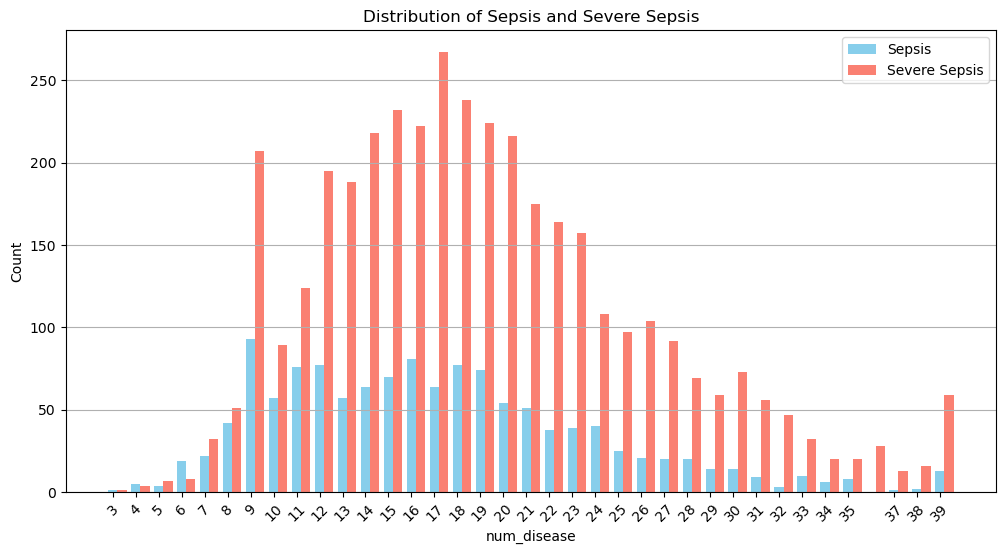

In [49]:
plt.figure(figsize=(12, 6))

# Plot the bar chart for filtered_sepsis
plt.bar(filtered_sepsis_result['num_disease'], filtered_sepsis_result['count'], width=0.4, label='Sepsis', align='center', color='skyblue')

# Plot the bar chart for filtered_severe_sepsis next to it with some offset
plt.bar(filtered_severe_sepsis_result['num_disease'] + 0.4, filtered_severe_sepsis_result['count'], width=0.4, label='Severe Sepsis', align='center', color='salmon')



# Add labels and title
plt.xlabel('num_disease')
plt.ylabel('Count')
plt.title('Distribution of Sepsis and Severe Sepsis')

# Sort the 'num_disease' column (optional)
sorted_indices = np.argsort(filtered_sepsis_result['num_disease'])
sorted_sepsis = filtered_sepsis_result.iloc[sorted_indices]
sorted_severe_sepsis = filtered_severe_sepsis_result.iloc[sorted_indices]

# Set x-axis ticks to match the categories in 'num_disease' column
plt.xticks(sorted_sepsis['num_disease'])

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display a legend to differentiate between the two datasets
plt.legend()

# Display the chart
plt.grid(axis='y')
plt.show()

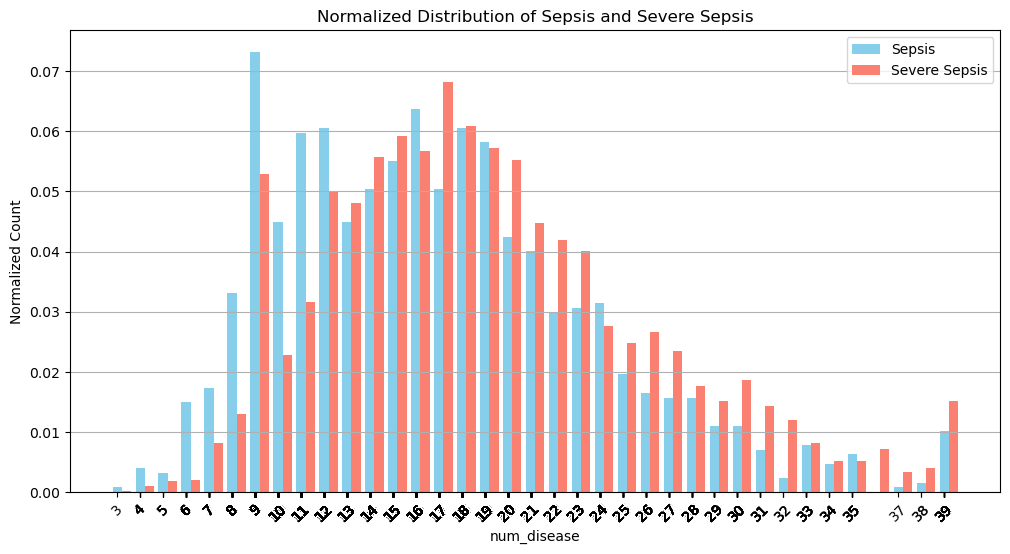

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'filtered_sepsis' and 'filtered_severe_sepsis' are your DataFrames

plt.figure(figsize=(12, 6))

# Calculate the total counts for both 'Sepsis' and 'Severe Sepsis'
total_sepsis_count = filtered_sepsis_result['count'].sum()
total_severe_sepsis_count = filtered_severe_sepsis_result['count'].sum()

# Normalize the counts by dividing by the total count
normalized_sepsis_counts = filtered_sepsis_result['count'] / total_sepsis_count
normalized_severe_sepsis_counts = filtered_severe_sepsis_result['count'] / total_severe_sepsis_count

# Plot the bar chart for normalized 'Sepsis' counts
plt.bar(filtered_sepsis_result['num_disease'], normalized_sepsis_counts, width=0.4, label='Sepsis', align='center', color='skyblue')

# Plot the bar chart for normalized 'Severe Sepsis' counts next to it with some offset
plt.bar(filtered_severe_sepsis_result['num_disease'] + 0.4, normalized_severe_sepsis_counts, width=0.4, label='Severe Sepsis', align='center', color='salmon')

# Add labels and title
plt.xlabel('num_disease')
plt.ylabel('Normalized Count')
plt.title('Normalized Distribution of Sepsis and Severe Sepsis')

# Set x-axis ticks to match the categories in 'num_disease' column
plt.xticks(filtered_sepsis['num_disease'])

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display a legend to differentiate between the two datasets
plt.legend()

# Display the chart
plt.grid(axis='y')
plt.show()


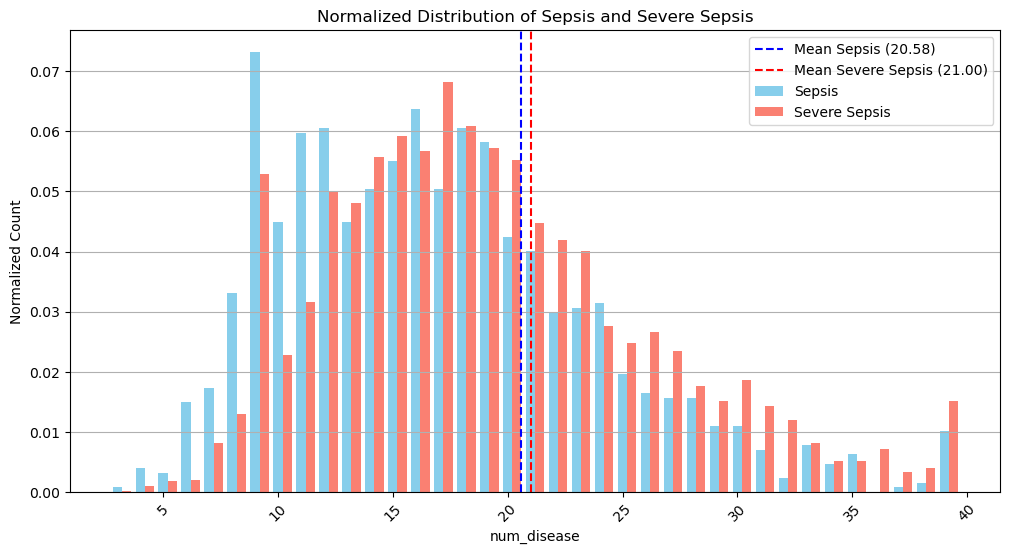

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'filtered_sepsis' and 'filtered_severe_sepsis' are your DataFrames

plt.figure(figsize=(12, 6))

# Calculate the total counts for both 'Sepsis' and 'Severe Sepsis'
total_sepsis_count = filtered_sepsis_result['count'].sum()
total_severe_sepsis_count = filtered_severe_sepsis_result['count'].sum()

# Normalize the counts by dividing by the total count
normalized_sepsis_counts = filtered_sepsis_result['count'] / total_sepsis_count
normalized_severe_sepsis_counts = filtered_severe_sepsis_result['count'] / total_severe_sepsis_count

# Calculate the mean for each 'num_disease' category
mean_sepsis = np.mean(filtered_sepsis_result['num_disease'])
mean_severe_sepsis = np.mean(filtered_severe_sepsis_result['num_disease'])

# Plot the bar chart for normalized 'Sepsis' counts
plt.bar(filtered_sepsis_result['num_disease'], normalized_sepsis_counts, width=0.4, label='Sepsis', align='center', color='skyblue')

# Plot the bar chart for normalized 'Severe Sepsis' counts next to it with some offset
plt.bar(filtered_severe_sepsis_result['num_disease'] + 0.4, normalized_severe_sepsis_counts, width=0.4, label='Severe Sepsis', align='center', color='salmon')

# Add vertical lines indicating the mean for both distributions along the 'num_disease' axis
plt.axvline(x=mean_sepsis, color='blue', linestyle='--', label=f'Mean Sepsis ({mean_sepsis:.2f})')
plt.axvline(x=mean_severe_sepsis, color='red', linestyle='--', label=f'Mean Severe Sepsis ({mean_severe_sepsis:.2f})')

# Add labels and title
plt.xlabel('num_disease')
plt.ylabel('Normalized Count')
plt.title('Normalized Distribution of Sepsis and Severe Sepsis')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display a legend to differentiate between the two datasets and the mean lines
plt.legend()

# Display the chart
plt.grid(axis='y')
plt.show()

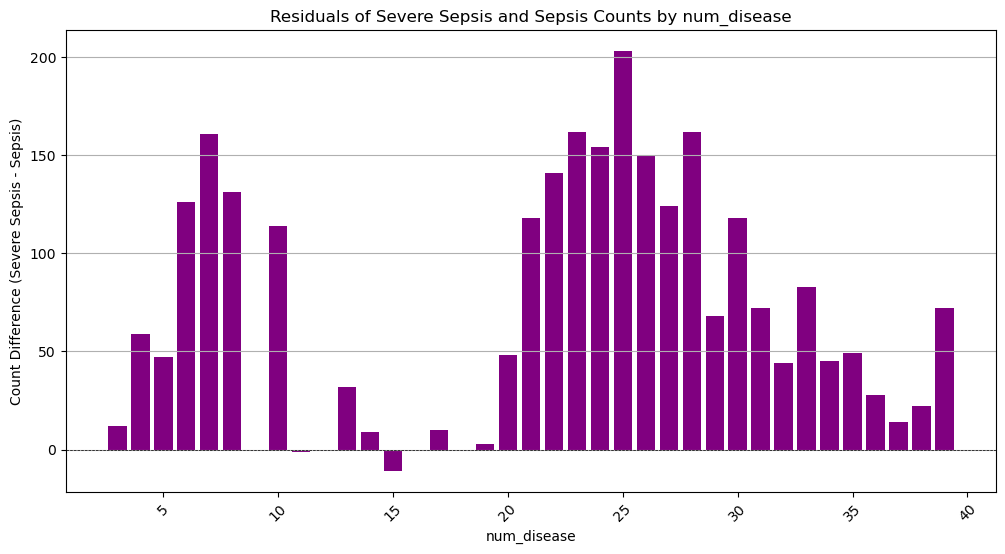

In [57]:

# Step 1: Make sure both DataFrames have the same 'num_disease' entries# This involves identifying unique 'num_disease' entries across both DataFrames
all_num_diseases = pd.concat([filtered_sepsis_result['num_disease'], filtered_severe_sepsis_result['num_disease']]).unique()

# Create a complete DataFrame template with all 'num_disease' entries
complete_sepsis = pd.DataFrame({'num_disease': all_num_diseases, 'count': 0}).sort_values('num_disease')
complete_severe_sepsis = complete_sepsis.copy()

# Step 2: Update the counts from your original DataFrames
# Use 'update' to change existing rows, non-existent rows in the original DataFrames remain as '0'
complete_sepsis.update(filtered_sepsis_result.set_index('num_disease'))
complete_severe_sepsis.update(filtered_severe_sepsis_result.set_index('num_disease'))

# Reset the index to make 'num_disease' a column again after the update
complete_sepsis.reset_index(drop=True, inplace=True)
complete_severe_sepsis.reset_index(drop=True, inplace=True)

# Step 3: Calculate the residuals now that both DataFrames align perfectly
residuals = complete_severe_sepsis['count'] - complete_sepsis['count']

# Plotting (this part remains the same as your original plot code)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(complete_sepsis['num_disease'], residuals, color='purple')
plt.xlabel('num_disease')
plt.ylabel('Count Difference (Severe Sepsis - Sepsis)')
plt.title('Residuals of Severe Sepsis and Sepsis Counts by num_disease')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [58]:
all_num_diseases

array([ 9, 16, 18, 12, 11, 19, 15, 17, 14, 10, 13, 20, 21,  8, 24, 23, 22,
       25,  7, 26, 28, 27,  6, 30, 29, 39, 33, 31, 35, 34,  4,  5, 32, 38,
       37,  3, 36])

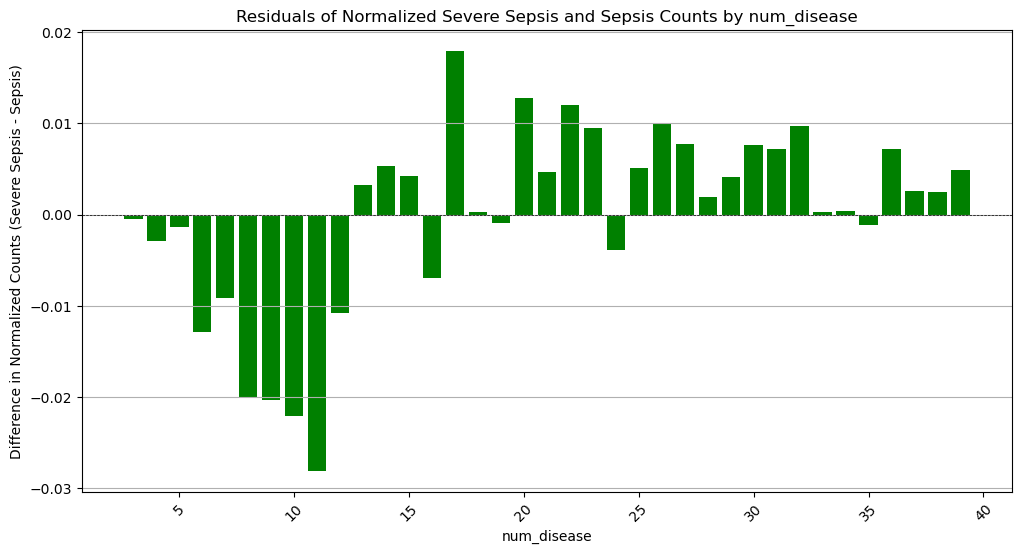

In [ ]:
# Step 1: Synchronize 'num_disease' categories
# Ensure that both DataFrames contain the same 'num_disease' values
# and none is missing in either compared to the other.

# Create a combined DataFrame of unique 'num_disease' values from both original DataFrames
unique_num_disease = pd.concat([filtered_sepsis_result['num_disease'], filtered_severe_sepsis_result['num_disease']]).unique()
unique_num_disease_df = pd.DataFrame(unique_num_disease, columns=['num_disease'])

# Merge this unique 'num_disease' DataFrame with the original DataFrames to synchronize them
synced_sepsis = pd.merge(unique_num_disease_df, filtered_sepsis_result, on='num_disease', how='left').fillna(0)
synced_severe_sepsis = pd.merge(unique_num_disease_df, filtered_severe_sepsis_result, on='num_disease', how='left').fillna(0)

# It's important to sort the DataFrames to ensure the 'num_disease' categories align
synced_sepsis.sort_values('num_disease', inplace=True)
synced_severe_sepsis.sort_values('num_disease', inplace=True)

# Step 2: Perform subtraction and plotting
# Now, we can safely calculate the residuals and plot them, as the 'num_disease' categories are synchronized.

# Calculate the residuals (differences) between the normalized counts of 'severe sepsis' and 'sepsis'
residuals_normalized = synced_severe_sepsis['normalized_count'] - synced_sepsis['normalized_count']

# Plotting the residuals
plt.figure(figsize=(12, 6))
plt.bar(synced_sepsis['num_disease'], residuals_normalized, color='green')
plt.xlabel('num_disease')
plt.ylabel('Difference in Normalized Counts (Severe Sepsis - Sepsis)')
plt.title('Residuals of Normalized Severe Sepsis and Sepsis Counts by num_disease')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)  # for visual reference
plt.xticks(rotation=45)  # if 'num_disease' labels are not fully visible
plt.grid(axis='y')
plt.show()
